# **Data Preparation and setup by Leitian**

In [0]:
# 在https://www.kaggle.com/账户名字/account 申请一个新的API TOKEN
# 然后 在下面第三行用自己的用户名和密码 替换placeholder

!pip install -U -q kaggle #安装kaggle命令行工具
!mkdir -p ~/.kaggle # 用用户名和apikey 登陆
!echo '{"username":"yizhengf","key":"719be4825d9b94e59ca01cf12d41434e"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# 下载数据
!mkdir -p raw 
!kaggle competitions download -c digit-recognizer -p raw

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# 装一个进度条包
#!pip install keras_tqdm

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# 读入训练数据
df = pd.read_csv('raw/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Split data into feature and label: X is feature, y is label
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
#把数据分成train//validation(test)， 比例0.8/0.2
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=2,train_size=0.8)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

Text(0.5,1,'2')

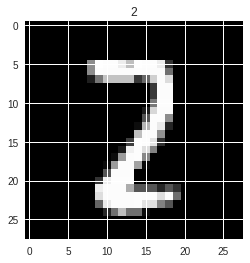

In [25]:
# 显示训练图片 change i to see different pictures
i=2
img=train_X.iloc[i].as_matrix()
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train_y.iloc[i])

# **Light GBM**

In [10]:
#!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 14.0MB/s 


## **LightGBM Classifier**

In [12]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)

lgbm.fit(X, y)

y_pred = lgbm.predict(test_X)

CPU times: user 6min 34s, sys: 794 ms, total: 6min 35s
Wall time: 3min 18s


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
y_pred.shape

(8400,)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,y_pred))

0.9996428571428572


In [17]:
# 读入submission的feature
df_submission_data = pd.read_csv('raw/test.csv')
df_submission_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 把测试数据转换为numpy array 并score
X_submission = df_submission_data.values
y_submission = lgbm.predict(X_submission)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
y_submission.shape

(28000,)

In [0]:
# 将结果存为竞赛需要的格式
df_submission = pd.DataFrame({'ImageId': range(1, y_submission.shape[0] + 1), 'Label': y_submission})
df_submission.to_csv('submission.csv', index=False)

In [24]:
# 命令行提交
!kaggle competitions submit -c digit-recognizer -f submission.csv -m 'lightgbm example submission'

100% 208k/208k [00:01<00:00, 147kB/s]
Successfully submitted to Digit Recognizer